# Dataset Features

This dataset provides information on a `(year, weekofyear)` timescale. Where applicable, units are indicated with a `_unit` suffix on the feature name.

## City and Date Indicators
- **city**: City abbreviations:
  - `sj` for San Juan
  - `iq` for Iquitos
- **week_start_date**: Date in `yyyy-mm-dd` format.

## NOAA's GHCN Daily Climate Data (Weather Station Measurements)
- **station_max_temp_c**: Maximum temperature (°C).
- **station_min_temp_c**: Minimum temperature (°C).
- **station_avg_temp_c**: Average temperature (°C).
- **station_precip_mm**: Total precipitation (mm).
- **station_diur_temp_rng_c**: Diurnal temperature range (°C).

## PERSIANN Satellite Precipitation Measurements
- **precipitation_amt_mm**: Total precipitation (mm) on a 0.25x0.25 degree scale.

## NOAA's NCEP Climate Forecast System Reanalysis Measurements
- **reanalysis_sat_precip_amt_mm**: Total precipitation (mm).
- **reanalysis_dew_point_temp_k**: Mean dew point temperature (K).
- **reanalysis_air_temp_k**: Mean air temperature (K).
- **reanalysis_relative_humidity_percent**: Mean relative humidity (%).
- **reanalysis_specific_humidity_g_per_kg**: Mean specific humidity (g/kg).
- **reanalysis_precip_amt_kg_per_m2**: Total precipitation (kg/m²).
- **reanalysis_max_air_temp_k**: Maximum air temperature (K).
- **reanalysis_min_air_temp_k**: Minimum air temperature (K).
- **reanalysis_avg_temp_k**: Average air temperature (K).
- **reanalysis_tdtr_k**: Diurnal temperature range (K).

## Satellite Vegetation - Normalized Difference Vegetation Index (NDVI)
(NOAA's CDR Normalized Difference Vegetation Index on a 0.5x0.5 degree scale)
- **ndvi_se**: NDVI for the pixel southeast of the city centroid.
- **ndvi_sw**: NDVI for the pixel southwest of the city centroid.
- **ndvi_ne**: NDVI for the pixel northeast of the city centroid.
- **ndvi_nw**: NDVI for the pixel northwest of the city centroid.

In [13]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
train_features = pd.read_csv('dados/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

train_labels = pd.read_csv('dados/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')

In [18]:
train_features.shape

(1456, 24)

In [17]:
train_labels.shape

(1456, 4)

# Análise exploratória dos dados

In [ ]:
all_data = pd.merge(train_features, train_labels, on=['city', 'year', 'weekofyear'])

missing_values = all_data.isnull().sum()

missing_values[missing_values > 0]

ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64

# Análise de segmentação

In [20]:
# testando preencher os dados com a media
data_imputed = all_data.fillna(train_features.mean(numeric_only=True))

numerical_cols = data_imputed.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data_imputed[numerical_cols]

In [21]:
numerical_data.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


### Testando métodos de clusterização

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Convertendo para DataFrame para manter a estrutura
scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_cols)

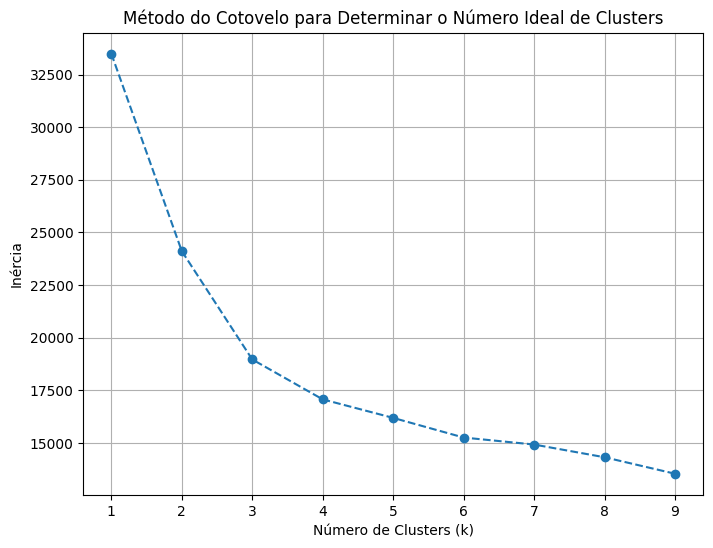

In [23]:
inertia_reduced = []
k_values_reduced = range(1, 10)  # Testando de 1 a 6 clusters

for k in k_values_reduced:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_df)
    inertia_reduced.append(kmeans.inertia_)

# Plotando o método do cotovelo com clusters reduzidos
plt.figure(figsize=(8, 6))
plt.plot(k_values_reduced, inertia_reduced, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.grid()
plt.show()

### Testes temperatura

In [26]:
temperature_data = scaled_data_df[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']]

# Aplicando K-Means para as variáveis selecionadas (temperatura)
kmeans_temp = KMeans(n_clusters=6, random_state=42)
temperature_clusters = kmeans_temp.fit_predict(temperature_data)

# Adicionando os rótulos ao dataframe original
data_imputed['Temp_Cluster'] = temperature_clusters

# Estatísticas descritivas para os clusters de temperatura
temp_cluster_summary = data_imputed.groupby('Temp_Cluster')[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].mean()
